<a href="https://colab.research.google.com/github/IsadoraPrevitalle/Analise_Exploratoria_Dados/blob/main/AnaliseDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt

Exploração do DataSet

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
#Tamanho
df.shape

(9700, 11)

In [ ]:
#5 primeiras linhas
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
#5 ultimas linhas
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [ ]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [ ]:
#Retirando uma análise estatistica dos dados
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
#Verificando se existem dados duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [ ]:
#Soma valores nulos das colunas do dataset
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Pergunta de negócio 1 - Cidade com maior valor de Venda de produtos da categoria 'Office Supplies'

In [ ]:
df_OS = df[df['Categoria']=='Office Supplies']

In [ ]:
df_total = df_OS.groupby('Cidade')['Valor_Venda'].sum()

In [ ]:
MaiorV = df_total.idxmax()

In [ ]:
print("A maior venda para essa categoria foi em",MaiorV)

A maior venda para essa categoria foi em New York City


### Pergunta de negócio 2 - Qual o total de vendas por data do pedido

In [ ]:
df_totalVendas = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [ ]:
df_totalVendas.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

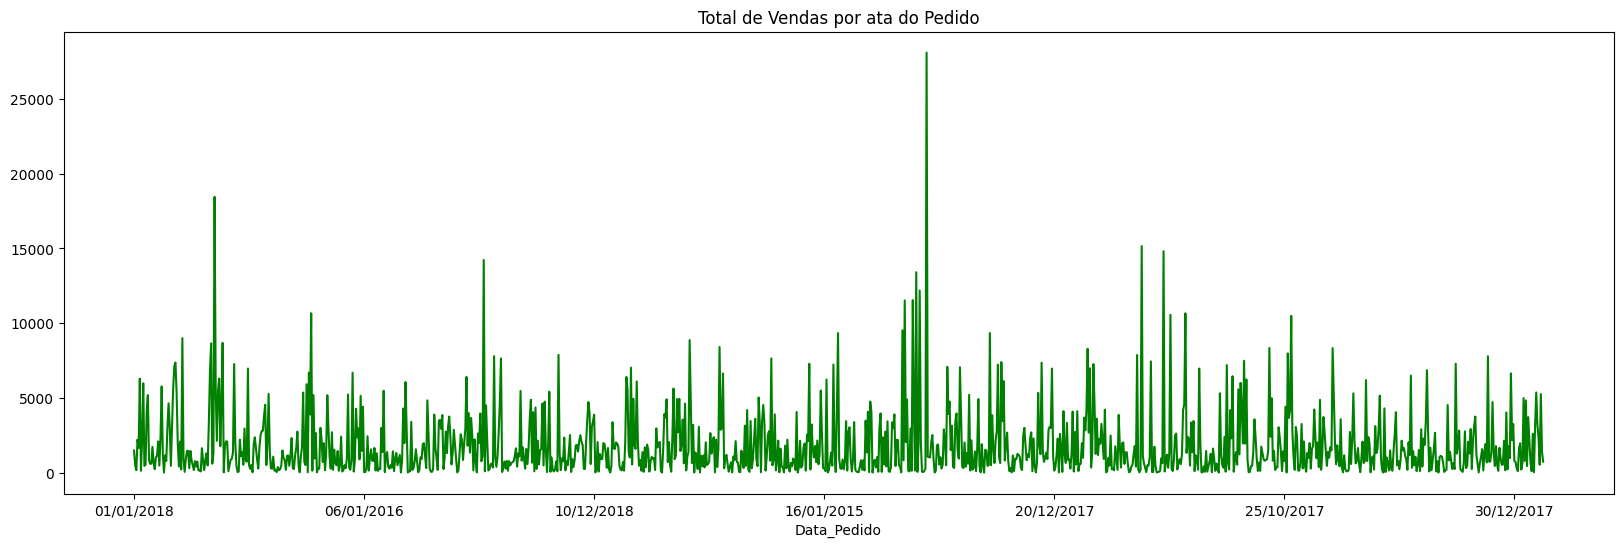

In [ ]:
plt.figure(figsize=(20, 6))
df_totalVendas.plot(x = 'Data_Pedido', y='Valor_Venda', color = 'green')
plt.title("Total de Vendas por ata do Pedido")
plt.show()


### Pergunta de negócio 3 - Qual o Total de Vendas por Estado

In [ ]:
df_totalVendasEstado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [ ]:
df_totalVendasEstado

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


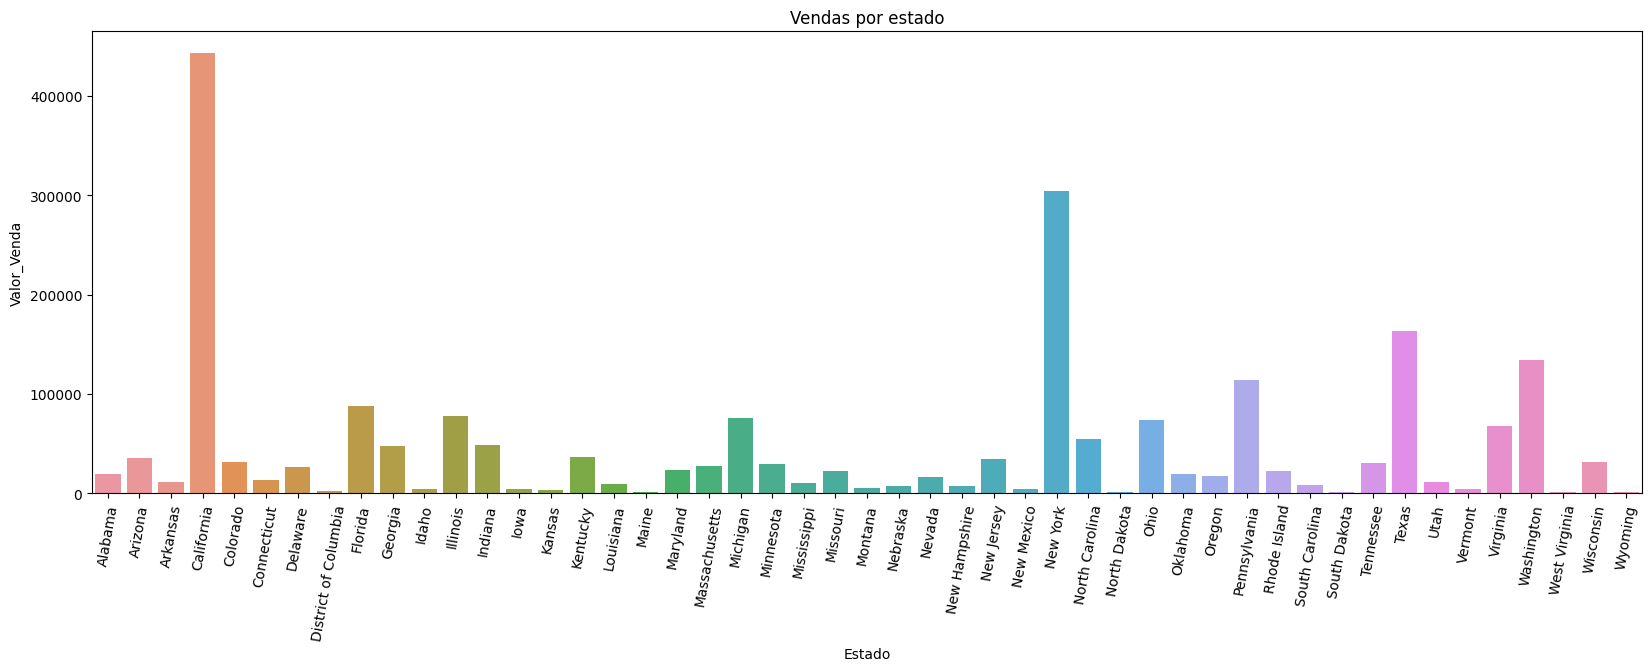

In [ ]:
plt.figure(figsize=(20,6))
sn.barplot(
    data = df_totalVendasEstado,
    y = 'Valor_Venda',
    x = 'Estado').set(title = "Vendas por estado")
plt.xticks(rotation = 80)
plt.show()



### Pergunta de negócio 4 - Quais são as 10 cidades com maior total de vendas

In [ ]:
tp10 = df.groupby ('Cidade')['Valor_Venda'].max().reset_index()

In [ ]:
tp10

,Cidade,Valor_Venda
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,665.408
3,Albuquerque,595.000
4,Alexandria,4164.050
...,...,...
523,Woonsocket,52.960
524,Yonkers,4899.930
525,York,422.058
526,Yucaipa,50.800


In [ ]:
top10 = tp10.sort_values(by=['Valor_Venda'], ascending = False).head(10)

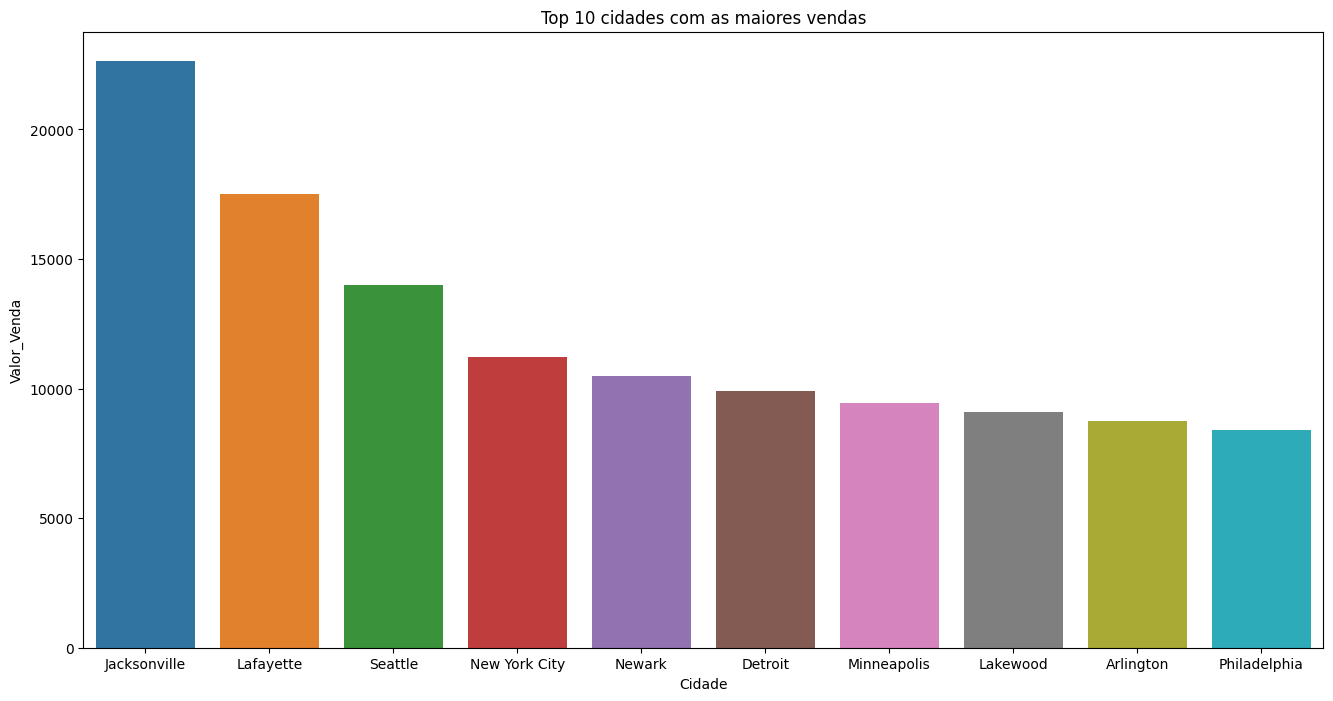

In [ ]:
plt.figure(figsize=(16,8))
sn.barplot(
    data = top10,
    x = 'Cidade',
    y = 'Valor_Venda'
).set(title="Top 10 cidades com as maiores vendas")
plt.show()

### Pergunta de negócio 5 - Qual o segmento teve o maior número de vendas

In [ ]:
Mseg = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()

In [ ]:
Mseg.sort_values(by='Valor_Venda', ascending = False)

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [ ]:
def formatacao(values):
  def format(pct):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return '$ {v:d}'.format(v = val)
  return format

<function matplotlib.pyplot.show(close=None, block=None)>

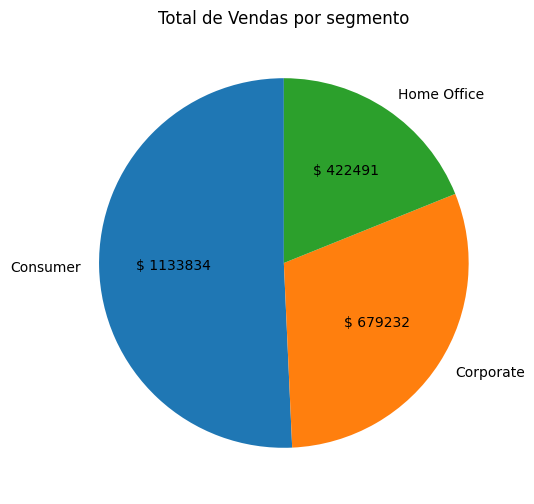

In [ ]:
plt.figure(figsize=(16,6))

plt.pie(
    Mseg['Valor_Venda'],
    labels=Mseg['Segmento'],
    autopct=formatacao(Mseg['Valor_Venda']),
    startangle = 90
)
plt.title("Total de Vendas por segmento")
plt.show

### Pergunta de negócio 6 - Qual o total de vendas por segmento e por ano

In [ ]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [ ]:
df['Ano'] = df['Data_Pedido'].dt.year

In [ ]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [ ]:
total = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum().reset_index

In [ ]:
total

<bound method Series.reset_index of Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64>

### Pergunta de negócio 7:
### Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo: Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
### Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
### Quantas Vendas Receberiam 15% de Desconto?

In [ ]:
desconto = (df['Valor_Venda'] > 1000).value_counts()

In [ ]:
desconto

False    9243
True      457
Name: Valor_Venda, dtype: int64

###Pergunta de negócio 8:
### Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.
### Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [ ]:
df['desconto'] = np.where (df['Valor_Venda']>1000,0.15,0.10)

In [ ]:
df['desconto'].value_counts()

0.10    9243
0.15     457
Name: desconto, dtype: int64

In [ ]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1


In [ ]:
df['Valor_Desconto'] = df['Valor_Venda']-(df['Valor_Venda']*df['desconto'])

In [ ]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,desconto,Valor_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1,20.54700
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1,48.88800
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1,177.09840
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1,3.25800


In [ ]:
MediaAnt = df.loc[df['desconto']==0.15, 'Valor_Venda']
MediaPost = df.loc[df['desconto']==0.15, 'Valor_Desconto']

In [ ]:
m1 = MediaAnt.mean()

In [ ]:
m2 = MediaPost.mean()

In [ ]:
print("Média antes das vendas era de",m1)
print("Média depois das vendas foi de",m2)

Média antes das vendas era de 2116.8078153172864
Média depois das vendas foi de 1799.2866430196934


###Pergunta de negócio 9:
### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

In [ ]:
df['mes'] =df['Data_Pedido'].dt.month

In [ ]:
mediaFinal = df.groupby(['Segmento','Ano','mes'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [ ]:
segm = mediaFinal.index.get_level_values(0)
ano = mediaFinal.index.get_level_values(1)
mes = mediaFinal.index.get_level_values(2)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1600x600 with 0 Axes>

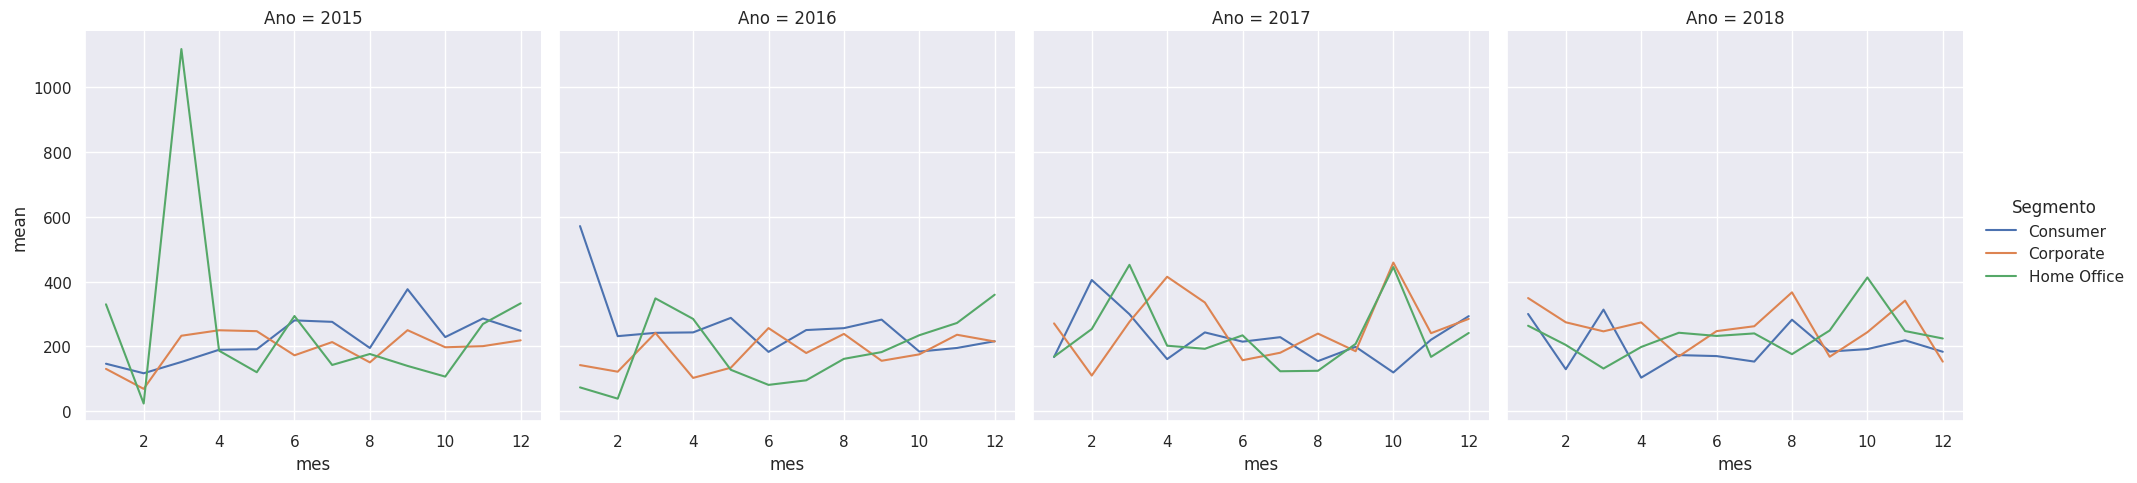

In [ ]:
plt.figure(figsize=(16,6))
sn.set()
fig1=sn.relplot(
    kind = 'line',
    data = mediaFinal,
    x = mes,
    y = 'mean',
    hue = segm,
    col = ano,
    col_wrap = 4
)
plt.show

##Pergunta de Negócio 10
###Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias

In [ ]:
sub = df.groupby(['Categoria','SubCategoria']).sum(numeric_only= True).sort_values(by='Valor_Venda', ascending=False).head(12)
sub

Valor_Venda      Ano  desconto  Valor_Desconto  \
Categoria       SubCategoria                                                   
Technology      Phones        325271.2940  1748496     90.15    286990.85830   
Furniture       Chairs        317919.6250  1201942     63.30    279816.75990   
Office Supplies Storage       216188.3620  1663791     84.75    191433.27010   
Furniture       Tables        202083.3600   627193     34.15    176938.45555   
Office Supplies Binders       194723.3810  2964618    149.10    169623.33495   
Technology      Machines      189238.6310   231912     13.65    162213.65840   
                Accessories   162791.3620  1504508     76.10    144162.61990   
                Copiers       146248.0940   133104      8.30    125379.85260   
Furniture       Bookcases     108045.0467   449734     23.50     95035.86235   
Office Supplies Appliances    104061.6930   915604     46.45     91938.64420   
Furniture       Furnishings    88862.7700  1865489     92.75     79694.54640   
Office Supplies Paper          76312.7640  2680255    132.90     68681.48760   

                                mes  
Categoria       SubCategoria         
Technology      Phones         6649  
Furniture       Chairs         4834  
Office Supplies Storage        6548  
Furniture       Tables         2466  
Office Supplies Binders       11451  
Technology      Machines        897  
                Accessories    5982  
                Copiers         516  
Furniture       Bookcases      1706  
Office Supplies Appliances     3583  
Furniture       Furnishings    7301  
Office Supplies Paper         10404

In [ ]:
V = sub[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [ ]:
V

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [ ]:
teste = "teste"

In [ ]:
teste = 'testet'